## **Chapter 18: Logistic Regression**
### **Exercise 2: Low birth weight?**
- Yêu cầu: Logistic Regression để thực hiện việc xác định trẻ có thiếu
cân hay không dựa vào thông tin còn lại.
- Cho dữ liệu birthweight_reduced.csv
- Tạo dataset
- In thông tin head, tail, số dòng, số cột, str, summary
- Vẽ biểu đồ quan sát mối liên hệ giữa các biến (corrplot)
- Tạo train:test từ dữ liệu data với tỉ lệ 80:20
- Áp dụng thuật toán Logistic Regression
- Kiểm tra độ chính xác
- Tìm kết quả Cho dữ liệu Test: c(12, 18, 4.5, 35, 1, 41, 7, 65, 125, 37, 14, 25, 68, 1, 1)

In [ ]:
library(corrplot)
library(Amelia)


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [ ]:
mydata <- read.csv("data/birthweight_reduced.csv")
print(str(mydata))

'data.frame':	42 obs. of  17 variables:
 $ id              : int  1313 431 808 300 516 321 1363 575 822 1081 ...
 $ headcirumference: int  12 12 13 12 13 13 12 12 13 14 ...
 $ length          : int  17 19 19 18 18 19 19 19 19 21 ...
 $ Birthweight     : num  5.8 4.2 6.4 4.5 5.8 6.8 5.2 6.1 7.5 8 ...
 $ Gestation       : int  33 33 34 35 35 37 37 37 38 38 ...
 $ smoker          : int  0 1 0 1 1 0 1 1 0 0 ...
 $ motherage       : int  24 20 26 41 20 28 20 19 20 18 ...
 $ mnocig          : int  0 7 0 7 35 0 7 7 0 0 ...
 $ mheight         : int  58 63 65 65 67 62 64 65 62 67 ...
 $ mppwt           : int  99 109 140 125 125 118 104 132 103 109 ...
 $ fage            : int  26 20 25 37 23 39 20 20 22 20 ...
 $ fedyrs          : int  16 10 12 14 12 10 10 14 14 12 ...
 $ fnocig          : int  0 35 25 25 50 0 35 0 0 7 ...
 $ fheight         : int  66 71 69 68 73 67 73 72 70 67 ...
 $ lowbwt          : int  1 1 0 1 1 0 1 0 0 0 ...
 $ mage35          : int  0 0 0 1 0 0 0 0 0 0 ...
 $ LowBirthWei

In [ ]:
# view the first few rows of the data
print(head(mydata))

    id headcirumference length Birthweight Gestation smoker motherage mnocig
1 1313               12     17         5.8        33      0        24      0
2  431               12     19         4.2        33      1        20      7
3  808               13     19         6.4        34      0        26      0
4  300               12     18         4.5        35      1        41      7
5  516               13     18         5.8        35      1        20     35
6  321               13     19         6.8        37      0        28      0
  mheight mppwt fage fedyrs fnocig fheight lowbwt mage35 LowBirthWeight
1      58    99   26     16      0      66      1      0            Low
2      63   109   20     10     35      71      1      0            Low
3      65   140   25     12     25      69      0      0         Normal
4      65   125   37     14     25      68      1      1            Low
5      67   125   23     12     50      73      1      0            Low
6      62   118   39     10  

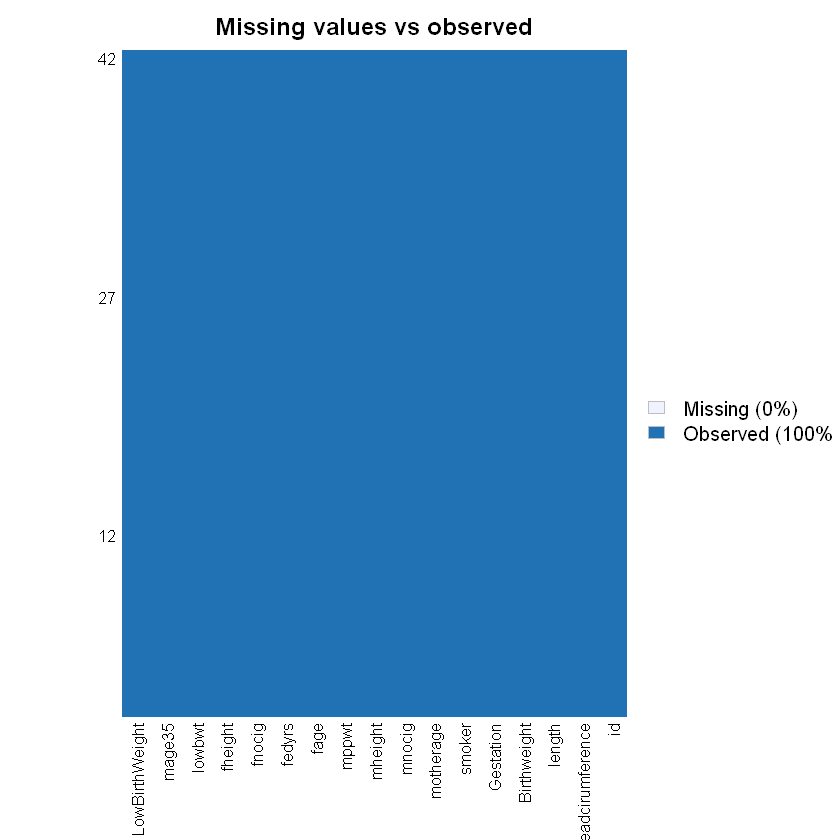

In [ ]:
missmap(mydata, main = "Missing values vs observed")

In [ ]:
print(table(mydata$LowBirthWeight))


   Low Normal 
     6     36 


In [ ]:
# calculating the correlation between each pair of numeric variables
correlations <- cor(mydata[,2:16])
correlations


,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
headcirumference,1.000000000,0.56532849,0.736396310,0.443974538,-0.17375085,0.112108327,-0.131437996,0.38129342,0.35759351,0.30136346,0.083416559,-0.02773428,0.040466392,-0.50024673,-0.005096869
length,0.565328491,1.00000000,0.697008279,0.651402769,-0.23534939,-0.020718949,-0.157138028,0.41473145,0.30439408,0.07890718,-0.050722880,0.01971581,0.187137302,-0.59224820,0.021074827
Birthweight,0.736396310,0.69700828,1.000000000,0.706291950,-0.30895001,0.001040475,-0.151227745,0.36794704,0.38958065,0.17679000,0.073869580,-0.08892720,0.024784274,-0.65180447,-0.108480485
Gestation,0.443974538,0.65140277,0.706291950,1.000000000,-0.09474608,0.010778455,0.043194856,0.23092930,0.25051553,0.14217533,0.130986636,-0.11383061,0.187866905,-0.60293498,0.007394508
smoker,-0.173750846,-0.23534939,-0.308950015,-0.094746078,1.00000000,0.212478786,0.727218092,0.03968201,0.01258798,0.19750145,-0.014890584,0.41763296,0.105835307,0.25301216,0.146938453
motherage,0.112108327,-0.02071895,0.001040475,0.010778455,0.21247879,1.000000000,0.340294378,0.04678404,0.27764134,0.80658442,0.441682660,0.09092664,-0.203603248,-0.07639372,0.692663889
mnocig,-0.131437996,-0.15713803,-0.151227745,0.043194856,0.72721809,0.340294378,1.000000000,0.17194248,0.15400811,0.24842538,0.198526204,0.25730739,0.008421145,0.03538366,0.290574154
mheight,0.381293418,0.41473145,0.367947042,0.230929298,0.03968201,0.046784040,0.171942477,1.00000000,0.67124662,-0.07166439,0.016249430,0.04909595,0.272823984,-0.20080064,0.108944153
mppwt,0.357593509,0.30439408,0.389580646,0.250515534,0.01258798,0.277641336,0.154008114,0.67124662,1.00000000,0.25340070,0.187700894,0.05077141,0.108319605,-0.33887910,0.147704096
fage,0.301363456,0.07890718,0.176790000,0.142175334,0.19750145,0.806584417,0.248425377,-0.07166439,0.25340070,1.00000000,0.300471472,0.13586202,-0.298559496,-0.24509537,0.351405036


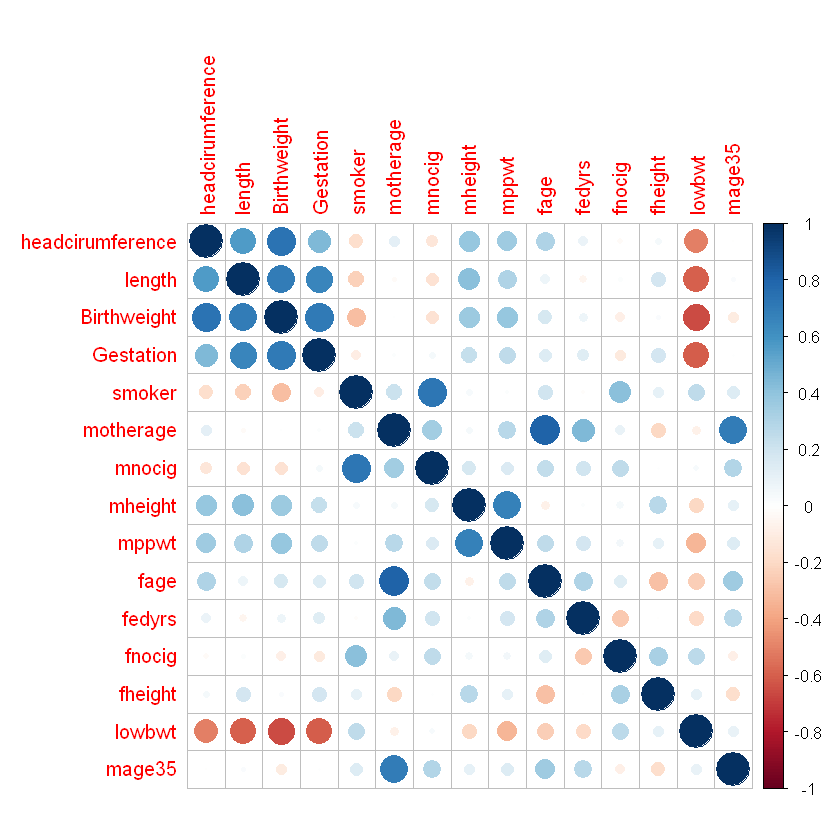

In [ ]:
corrplot(correlations, method="circle")

In [ ]:
# divided into train and test: 70 - 30
mydata <- mydata[, 2:17]
print(head(mydata))

  headcirumference length Birthweight Gestation smoker motherage mnocig mheight
1               12     17         5.8        33      0        24      0      58
2               12     19         4.2        33      1        20      7      63
3               13     19         6.4        34      0        26      0      65
4               12     18         4.5        35      1        41      7      65
5               13     18         5.8        35      1        20     35      67
6               13     19         6.8        37      0        28      0      62
  mppwt fage fedyrs fnocig fheight lowbwt mage35 LowBirthWeight
1    99   26     16      0      66      1      0            Low
2   109   20     10     35      71      1      0            Low
3   140   25     12     25      69      0      0         Normal
4   125   37     14     25      68      1      1            Low
5   125   23     12     50      73      1      0            Low
6   118   39     10      0      67      0      0        

In [ ]:
n = nrow(mydata)
trainIndex = sample(1:n, size = round(0.7*n), replace=FALSE)
train = mydata[trainIndex ,]
test = mydata[-trainIndex ,]
print("Rows of training data and test data:")
print(nrow(train))
print(nrow(test))


[1] "Rows of training data and test data:"
[1] 29
[1] 13


In [ ]:
# estimates a logistic regression model using the glm (generalized linear model) 
mylogit <- glm(as.factor(LowBirthWeight) ~ ., data = train, family = "binomial")
print(summary(mylogit))


Call:
glm(formula = as.factor(LowBirthWeight) ~ ., family = "binomial", 
    data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-3.971e-06   3.971e-06   3.971e-06   3.971e-06   3.971e-06  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)       2.557e+01  2.241e+06       0        1
headcirumference  4.859e-07  8.552e+04       0        1
length            3.622e-07  9.131e+04       0        1
Birthweight      -4.454e-07  7.126e+04       0        1
Gestation        -1.185e-07  3.992e+04       0        1
smoker           -8.892e-07  1.342e+05       0        1
motherage         7.375e-08  2.479e+04       0        1
mnocig            4.007e-09  5.303e+03       0        1
mheight          -5.174e-08  3.009e+04       0        1
mppwt             5.827e-10  4.814e+03       0        1
fage             -4.827e-08  1.593e+04       0        1
fedyrs            6.189e-08  2.522e+04       0        1
fnocig            7.7

In [ ]:
pred = predict(mylogit, 
            newdata = test, 
            type = "response")
pred_value <- ifelse(pred > 0.5, "Normal", "Low")
print("Testdata admit vs predict:")
result <- data.frame(Actual = test$LowBirthWeight, pred_value)
print(result)


[1] "Testdata admit vs predict:"
   Actual pred_value
2     Low        Low
3  Normal     Normal
7     Low        Low
10 Normal     Normal
14 Normal     Normal
15 Normal     Normal
18 Normal     Normal
19    Low        Low
28 Normal     Normal
33 Normal     Normal
35 Normal     Normal
39 Normal     Normal
41 Normal     Normal


In [ ]:
# SOLUTION 1
misClasificError <- mean(pred_value != test$LowBirthWeight)
print(paste('Accuracy s2: ',1-misClasificError))

[1] "Accuracy s2:  1"


In [ ]:
names(test)

[1] "headcirumference" "length"           "Birthweight"      "Gestation"       
 [5] "smoker"           "motherage"        "mnocig"           "mheight"         
 [9] "mppwt"            "fage"             "fedyrs"           "fnocig"          
[13] "fheight"          "lowbwt"           "mage35"           "LowBirthWeight"

In [ ]:
# predict new
# sample: (12, 18, 4.5, 35, 1, 41, 7, 65, 125, 37, 14, 25, 68, 1, 1)
y1 <- predict(mylogit, 
 newdata = data.frame(headcirumference = c(12), 
                        length = c(18), 
                        Birthweight = c(4.5),
                        Gestation = c(35),
                        smoker = c(1), 
                        motherage = c(41), 
                        mnocig = c(7),
                        mheight = c(65),
                        mppwt = c(125),
                        fage = c(37),
                        fedyrs = c(14),
                        fnocig = c(25),
                        fheight = c(68), 
                        lowbwt = c(1),
                        mage35 = c(1)), 
                        type='response'
) 
y1 <- ifelse(y1 > 0.5, 1, 0)
print("results:")
print(y1)

[1] "results:"
1 
0 
